1. You must jump each peg over another peg, but only if there is an open space.
2. Each peg you jump over must be removed.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [2]:
def board_init():
    board = []
    for row in range(1,6):
        board.append([1 for i in range(row)])

    a = random.choice([i for i in range(5)])
    b = random.choice([i for i in range(a+1)])
    start = (a,b)
    board[a][b] = 0
    return board, start

def select_piece():
    a = random.choice([i for i in range(5)])
    b = random.choice([i for i in range(a+1)])
    return a,b 
    
def check_neighbors(board,a,b):
    moves = []
    if a+2 <= 4:
        if board[a+1][b] == 1 and board[a+2][b] == 0:
            moves.append((a+1,b,a+2,b))
        if b+2 <= 4:
            if board[a+1][b+1] == 1 and board[a+2][b+2] == 0:
                moves.append((a+1,b+1,a+2,b+2))
    if a-2 >= 0:
        if b <= a-2:
            if board[a-1][b] == 1 and board[a-2][b] == 0:
                moves.append((a-1,b,a-2,b))
        if b-2 >= 0:
            if board[a-1][b-1] == 1 and board[a-2][b-2] == 0: 
                moves.append((a-1,b-1,a-2,b-2))
    if b+2 <= a:
        if board[a][b+1] == 1 and board[a][b+2] == 0:
            moves.append((a,b+1,a,b+2))
    if b-2 >= 0:
        if board[a][b-1] == 1 and board[a][b-2] == 0:
            moves.append((a,b-1,a,b-2))
    return moves 
                        
def move_piece(board,a,b,x,y,g,h):
    board[a][b] = 0
    board[x][y] = 0
    board[g][h] = 1

def play_game():
    
    directions = []
    B = board_init()
    board = B[0]
    start = B[1]
    pieces = 14
    coords = set() ; boolie = True  

    while boolie == True :
                 
        a,b = select_piece() 
        if board[a][b] == 1:
            coords.add((a,b))
            possible_moves = check_neighbors(board,a,b)
            
            if len(possible_moves) != 0:
                move = random.choice(possible_moves)
                x, y, xprime, yprime = move     
                move_piece(board,a,b,x,y,xprime,yprime)      
                directions.append(((a,b),(xprime,yprime))) # (coordinates), (move)
                pieces -= 1 
                coords = set()

        if len(coords) == pieces:
            boolie = False
            
    clean_board = []
    for row in range(1,6):
        clean_board.append([1 for i in range(row)])
    clean_board[start[0]][start[1]] = 0
    
    return [pieces, start, clean_board, board, directions]

def sim_environment(num_sim):
    
    results = []
    while num_sim >= 0:
        simulation = play_game()
        results.append(simulation)
        num_sim -= 1
    
    return results

def rotation(board):
    
    # inner 
    hold = board[3][2]
    board[3][2] = board[2][1]
    board[2][1] = board[3][1]
    board[3][1] = hold
    
    # verticies 
    hold = board[4][4]
    board[4][4] = board[0][0]
    board[0][0] = board[4][0]
    board[4][0] = hold
    
    # edges
    a = board[3][0] ; b = board[2][0] ; c = board[1][0]
    board[3][0] = bolard[4][3] ; board[2][0] = board[4][2] ; board[1][0] = board[4][1]
    board[4][3] = board[1][1] ; board[4][2] = board[2][2] ; board[4][1] = board[3][3]
    board[1][1] = a ; board[2][2] = b ; board [3][3] = c
    
    return board

In [3]:
num_sim = 1e6
SIMUL = sim_environment(num_sim)

pieces = [i[0] for i in SIMUL]
start =  [i[1] for i in SIMUL]
clean_board = [i[2] for i in SIMUL]
board = [i[3] for i in SIMUL]
moves = [tuple(i[4]) for i in SIMUL]

data = pd.DataFrame({'pieces':pieces,'start':start,'clean_board':clean_board,'board':board,'moves':moves})

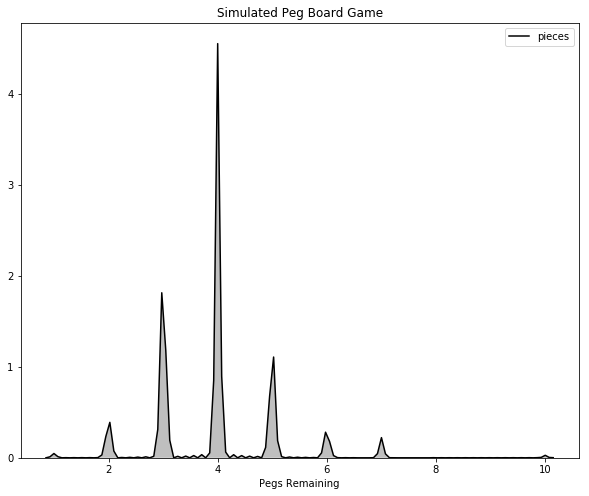

0.01% of games ended with 8.0 pegs left
0.27% of games ended with 10.0 pegs left
0.51% of games ended with 1.0 pegs left
2.29% of games ended with 7.0 pegs left
3.96% of games ended with 6.0 pegs left
5.35% of games ended with 2.0 pegs left
15.29% of games ended with 5.0 pegs left
25.67% of games ended with 3.0 pegs left
46.65% of games ended with 4.0 pegs left


In [18]:
plt.figure(figsize = (10,8))
plt.title('Simulated Peg Board Game')
plt.xlabel('Pegs Remaining')
sns.kdeplot(data['pieces'], shade=True, color="k")
plt.show()

results = []
for freq in data['pieces'].unique():
    number = data[data['pieces'] == freq] 
    results.append([freq,(len(number)/len(data))*100])
    
df_results = pd.DataFrame({'freq':[i[0] for i in results],'perc':[i[1] for i in results]}).sort_values(by=['perc'])

for i in range(len(df_results)):
    test = df_results.iloc[i]
    print("{}% of games ended with {} pegs left".format(round(test['perc'],2),test['freq']))

The goal of the peg game is to clear the board with only one peg remaining. While the number of possible winning movesets is low, and a player with random moves is extremely unlikely to win, there are other peg outcomes with lower probabilities of happening (8, 10 pegs).

A few things to note, all the information to find out exactly how many unique winning move sets there are for each peg count. All I'd have to do is write a function that rotates the triangle and apply it to all of the logged solutions. This along with generalizing the playing board to other shapes could serve as an interesting combinatorial problem. 

### A Solution

* Starting board
* ((piece to move), (where to move to))
* Final board

In [5]:
solution = data[data['pieces'] == 1] 
iD = 1

for i in solution['clean_board'].iloc[iD]:
    print(i)
print('-'*18)
for i in solution['moves'].iloc[iD]:
    print(i)
print('-'*18)
for i in solution['board'].iloc[iD]:
    print(i)

[1]
[1, 0]
[1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1, 1]
------------------
((3, 3), (1, 1))
((2, 0), (2, 2))
((4, 1), (2, 1))
((1, 1), (3, 1))
((0, 0), (2, 0))
((3, 0), (1, 0))
((4, 3), (4, 1))
((2, 2), (4, 2))
((4, 1), (4, 3))
((4, 4), (4, 2))
((4, 2), (2, 0))
((1, 0), (3, 0))
((4, 0), (2, 0))
------------------
[0]
[0, 0]
[1, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
